In [34]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [35]:
#import csv and turn into dataframe
file_path = "BPM_CSV.csv"
bpm_df = pd.read_csv(file_path)
bpm_df.head()

,Unnamed: 0,Rank,Song,Artist,Year,Lyrics,Source,BPM
0,0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0,NaN
1,1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0,NaN
2,2,3,i cant get no satisfaction,the rolling stones,1965,NAN,1.0,NaN
3,3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0,NaN
4,4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0,NaN


In [36]:
#Remove blank rows
clean_bpm_df = bpm_df.replace(" ","NaN")
clean_bpm_df = bpm_df.dropna(subset=["BPM"])
clean_bpm_df = clean_bpm_df.reset_index(drop=True)
clean_bpm_df = clean_bpm_df[["Rank","Song","Artist","Year","Lyrics", "Source", "BPM"]]
clean_bpm_df.head()
#clean_bpm_df.count()

,Rank,Song,Artist,Year,Lyrics,Source,BPM
0,7,help,the beatles,1965,help i need somebody help not just anybody hel...,3.0,112.0
1,9,crying in the chapel,elvis presley,1965,you saw me crying in the chapel the tears i s...,1.0,72.0
2,10,my girl,the temptations,1965,ive got sunshine on a cloudy day when its cold...,3.0,104.0
3,11,help me rhonda,the beach boys,1965,well since she put me down i ve been out doin ...,3.0,140.0
4,21,unchained melody,the righteous brothers,1965,oh my love my darling ive hungered for your t...,1.0,98.0


In [37]:
average_bpm=clean_bpm_df["BPM"].mean()
print(average_bpm)

120.1869618696187


In [38]:
max_bpm=clean_bpm_df.loc[clean_bpm_df["BPM"].idxmax()]
min_bpm=clean_bpm_df.loc[clean_bpm_df["BPM"].idxmin()]
print(max_bpm)
print(min_bpm)

Rank                                                     52
Song                                   how can we be lovers
Artist                                       michael bolton
Year                                                   1990
Lyrics     how can we be lovers if we cant be friends ho...
Source                                                    1
BPM                                                     208
Name: 1226, dtype: object
Rank                                                     68
Song                                        show me the way
Artist                                                 styx
Year                                                   1991
Lyrics     every night i say a prayer in the hopes that ...
Source                                                    1
BPM                                                      52
Name: 1289, dtype: object


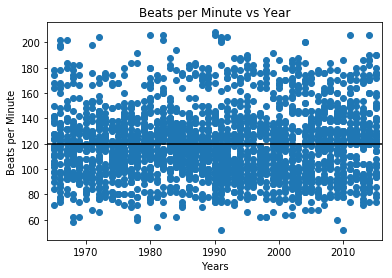

In [39]:
#Scatterplot Year vs Beats per minute
#plt.figure(figsize=(15,10))
plt.scatter(clean_bpm_df["Year"], clean_bpm_df["BPM"])
plt.title('Beats per Minute vs Year')
plt.xlabel('Years')
plt.ylabel('Beats per Minute')
plt.xlim(1964,2016)
#plt.grid()
plt.hlines(120, 1964, 2016)
plt.savefig("bpm_year.png")
plt.show()

In [40]:
#Create Bins
#bins = [0, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2016]
#group_names = ['<1970', '1970-1974', '1975-1979', '1980-1984', '1985-1989', '1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010+']

bins = [0, 1970, 1980, 1990, 2000, 2010, 2016]
group_names = ['<1970', '1970-1979', '1980-1989', '1990-1999', '2000-2009', '2010+']
#new dataframe and groupby
decade_df = clean_bpm_df.copy()
decade_df["Decade"] = pd.cut(clean_bpm_df["Year"], bins, labels=group_names)
decade_groups = decade_df.groupby(["Decade"])

#find average bpm per decade
decade_average = decade_groups["BPM"].mean()
decade_count = decade_groups["BPM"].count()

bpm_decade_df = pd.DataFrame({
                      "BPM Average" : decade_average,})
                    #"Songs With BPM Data" : decade_count})

bpm_decade_df

,BPM Average
Decade,
<1970,119.042373
1970-1979,118.607375
1980-1989,120.415771
1990-1999,118.209446
2000-2009,120.700219
2010+,126.850000


C:\Users\rapon\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


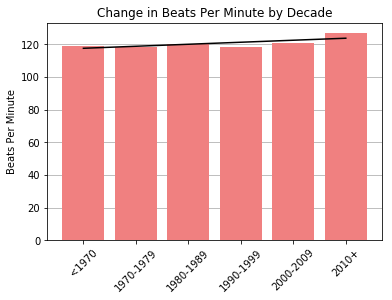

In [47]:
#Bar Chart of BPM and Decades
x_axis=np.arange(6)
(slope, intercept, _,_ , _) = stats.linregress(np.arange(6), bpm_decade_df["BPM Average"])
fit = slope * x_axis + intercept
plt.plot(fit, color="black")

plt.bar(x_axis, bpm_decade_df["BPM Average"], color="lightcoral")
#bpm_by_decade = bpm_decade_df.plot(kind="bar", legend= False, rot=45)
ax = plt.axes()
ax.yaxis.grid()
ax.set_axisbelow(True)
plt.xticks(x_axis,group_names, rotation=45)
#calc the trendline
#slope, intercept, r_value, p_value, std_err = stats.linregress(decade_groups,decade_average)
# the line equation:
#print "y=%.6fx+(%.6f)"%(z[0],z[1])
# Set a title for the chart
plt.ylabel("Beats Per Minute")
plt.title("Change in Beats Per Minute by Decade")
plt.savefig("bpm_decade.png")
plt.show()


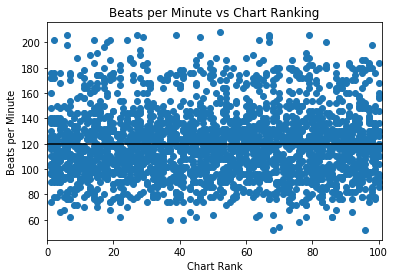

In [42]:
#Scatterplot Rank vs Beats per minute
#plt.figure(figsize=(15,10))
plt.scatter(clean_bpm_df["Rank"], clean_bpm_df["BPM"])
plt.title('Beats per Minute vs Chart Ranking')
plt.xlabel('Chart Rank')
plt.ylabel('Beats per Minute')
plt.xlim(0,101)
#plt.grid()
plt.hlines(120, 0, 101)
plt.savefig("bpm_rank.png")
plt.show()